## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv"
df = pd.read_csv(url)
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [ ]:
#3 check missing values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


In [4]:
missing_values = df.isnull().sum()
missing_values

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

4. The overview reveals a 0 missing values. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


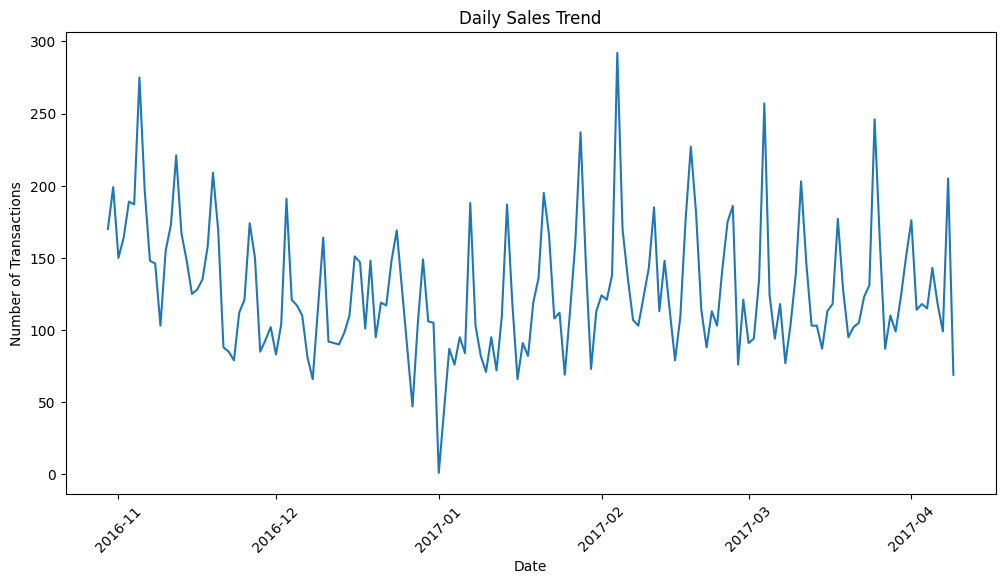

In [ ]:
# 5


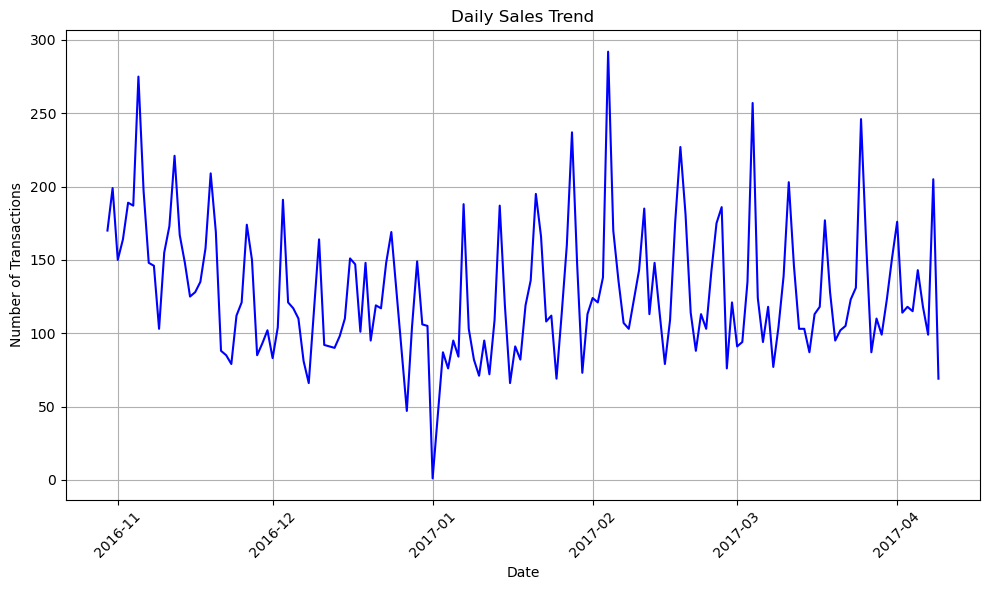

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Extract the date from the 'date_time' column
df['date'] = df['date_time'].dt.date

# Count the number of transactions per day
daily_transactions = df.groupby('date').size()

# Plot the daily transaction trend
plt.figure(figsize=(10, 6))
plt.plot(daily_transactions.index, daily_transactions.values, label='Transactions', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [8]:
# Convert 'date_time' column to datetime
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

# Extract additional time-related features
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['day_name'] = df['date_time'].dt.day_name()

# Display the first few rows of the processed dataset
df.head

<bound method NDFrame.head of        Transaction           Item           date_time period_day  \
0                1          Bread 2016-10-30 09:58:00    morning   
1                2   Scandinavian 2016-10-30 10:05:00    morning   
2                2   Scandinavian 2016-10-30 10:05:00    morning   
3                3  Hot chocolate 2016-10-30 10:07:00    morning   
4                3            Jam 2016-10-30 10:07:00    morning   
...            ...            ...                 ...        ...   
20502         9682         Coffee 2017-04-09 14:32:00  afternoon   
20503         9682            Tea 2017-04-09 14:32:00  afternoon   
20504         9683         Coffee 2017-04-09 14:57:00  afternoon   
20505         9683         Pastry 2017-04-09 14:57:00  afternoon   
20506         9684      Smoothies 2017-04-09 15:04:00  afternoon   

      weekday_weekend        date  hour  day  month  year day_name  
0             weekend  2016-10-30     9   30     10  2016   Sunday  
1             w

In [ ]:
# 6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
12739,6266,Coffee,2017-02-09 12:02:00,afternoon,weekday,9,2,2017,12:02:00,12,Thursday
5397,2676,Coffee,2016-12-05 15:00:00,afternoon,weekday,5,12,2016,15:00:00,15,Monday
11338,5637,Sandwich,2017-01-30 12:22:00,afternoon,weekday,30,1,2017,12:22:00,12,Monday
13508,6584,Baguette,2017-02-14 16:29:00,afternoon,weekday,14,2,2017,16:29:00,16,Tuesday
19862,9389,Cake,2017-04-04 15:47:00,afternoon,weekday,4,4,2017,15:47:00,15,Tuesday



Alright, now I can easily create a visualization of monthly sales.

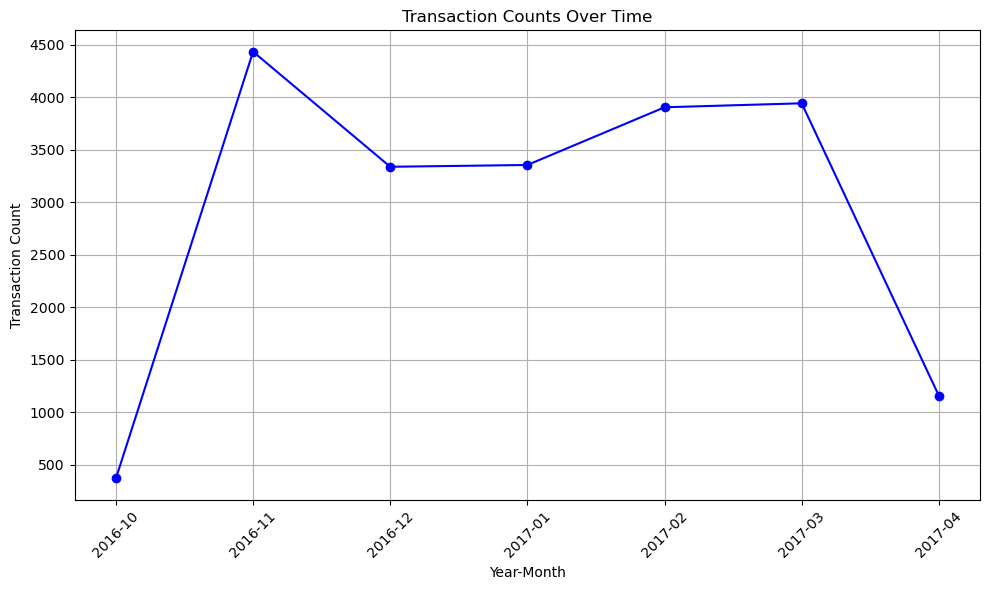

In [9]:
df['year_month'] = df['date_time'].dt.to_period('M')
monthly_transactions = df.groupby('year_month').size()

# Plot the monthly transaction trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, marker='o', color='blue')
plt.title('Transaction Counts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


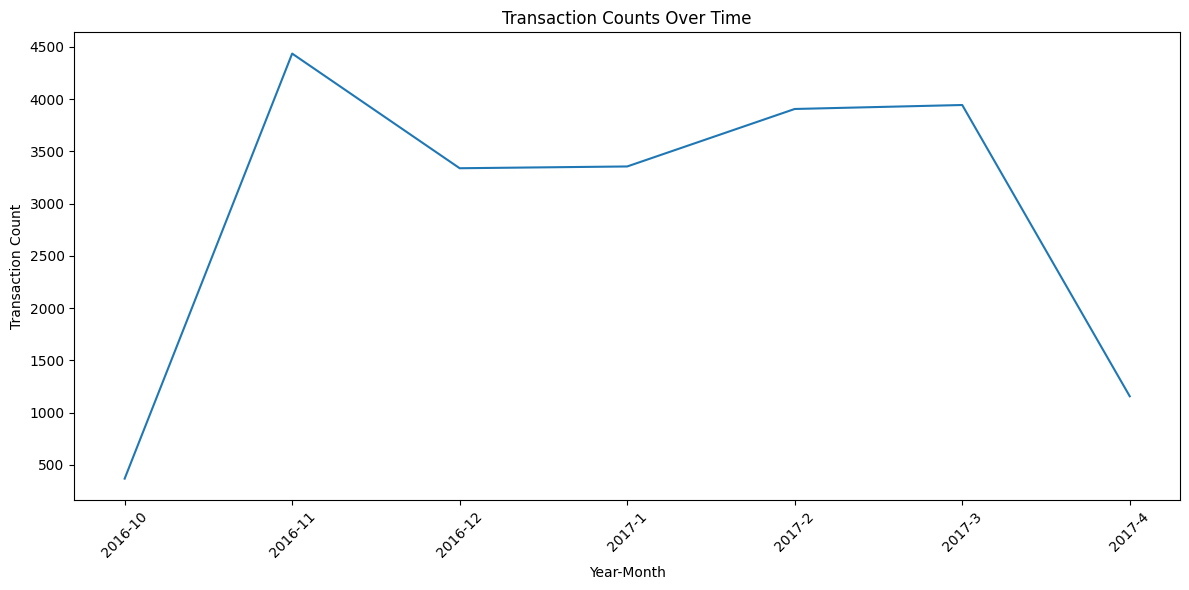

In [ ]:
# 7


8. Now, the visualization above provides better insights: The visualization indicates that transaction counts peaked in November 2016. After a sharp decline in December, the transactions steadily increased again in early 2017, potentially highlighting a seasonal trend. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [12]:
weekday_days = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()
weekend_days = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

# Print unique weekday and weekend names
print("Unique weekday names:", weekday_days)
print("Unique weekend names:", weekend_days)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


In [ ]:
#9


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [14]:
# Create a pivot table for transactions by month and day_name
transaction_pivot = df.pivot_table(
    index=df['month'],  # Rows: Month
    columns=df['day_name'],  # Columns: Day Name
    values='Transaction',  # Values: Transaction counts
    aggfunc='count'  # Aggregation: Count of transactions
)

# Fill NaN values with 0 (in case any days have no transactions)
transaction_pivot = transaction_pivot.fillna(0).astype(int)

# Rename index for better readability
transaction_pivot.index.name = 'month'

# Display the resulting pivot table
transaction_pivot

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1,489,329,807,536,399,474,322
2,599,474,879,650,456,429,419
3,674,379,883,559,557,433,459
4,99,118,381,183,118,115,143
10,0,199,0,170,0,0,0
11,639,469,879,683,591,599,576
12,624,356,776,314,525,342,402


In [ ]:
#10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is Weekends (Saturday and Sunday) have consistently higher transaction counts than weekdays. Additionally, November and December stand out as peak months for transactions, whereas April sees a significant drop in activity


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

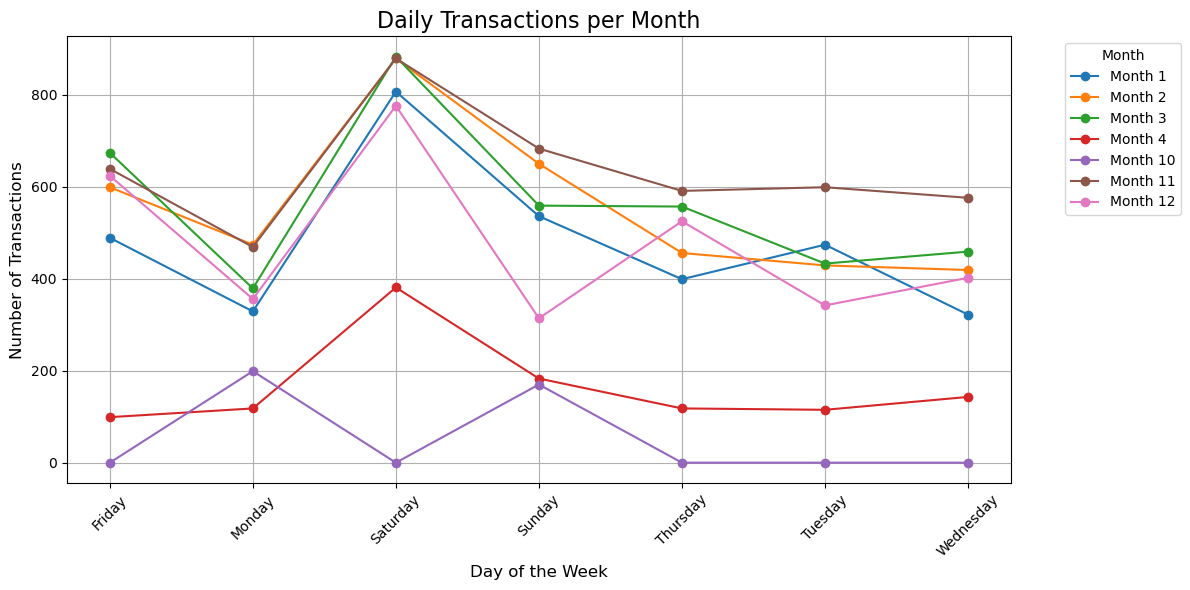

In [17]:
plt.figure(figsize=(12, 6))

for month in transaction_pivot.index:
    plt.plot(transaction_pivot.columns, transaction_pivot.loc[month], marker='o', label=f'Month {month}')

plt.title('Daily Transactions per Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


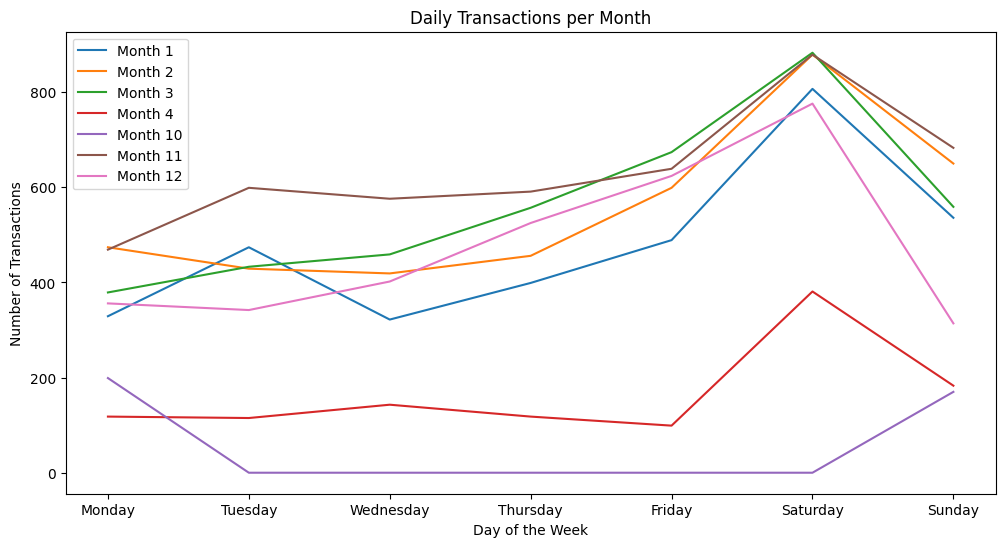

In [ ]:
# 12


13. Wow, after visualizing it like this, I can gain insights into the sales trends that  weekends (Saturday and Sunday) consistently show the highest transaction counts across all months, while weekdays, particularly Monday, tend to have lower transaction counts. Seasonal spikes are evident in November and December, reflecting holiday activity

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [20]:
print(df['period_day'].unique())


['morning' 'afternoon' 'evening' 'night']


In [ ]:
# 14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [22]:
# Extract unique hours for each period_day
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

# Display the results
print("Unique morning_hour:", sorted(morning_hours))
print("Unique afternoon_hour:", sorted(afternoon_hours))
print("Unique evening_hour:", sorted(evening_hours))
print("Unique night_hour:", sorted(night_hours))


Unique morning_hour: [1, 7, 8, 9, 10, 11]
Unique afternoon_hour: [12, 13, 14, 15, 16]
Unique evening_hour: [17, 18, 19, 20]
Unique night_hour: [21, 22, 23]


In [ ]:
# 15


Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why? the hour "1" (1:00 AM) is classified as part of the morning period. This is unusual because in most conventions, 1:00 AM is typically considered part of the night period, not the morning.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

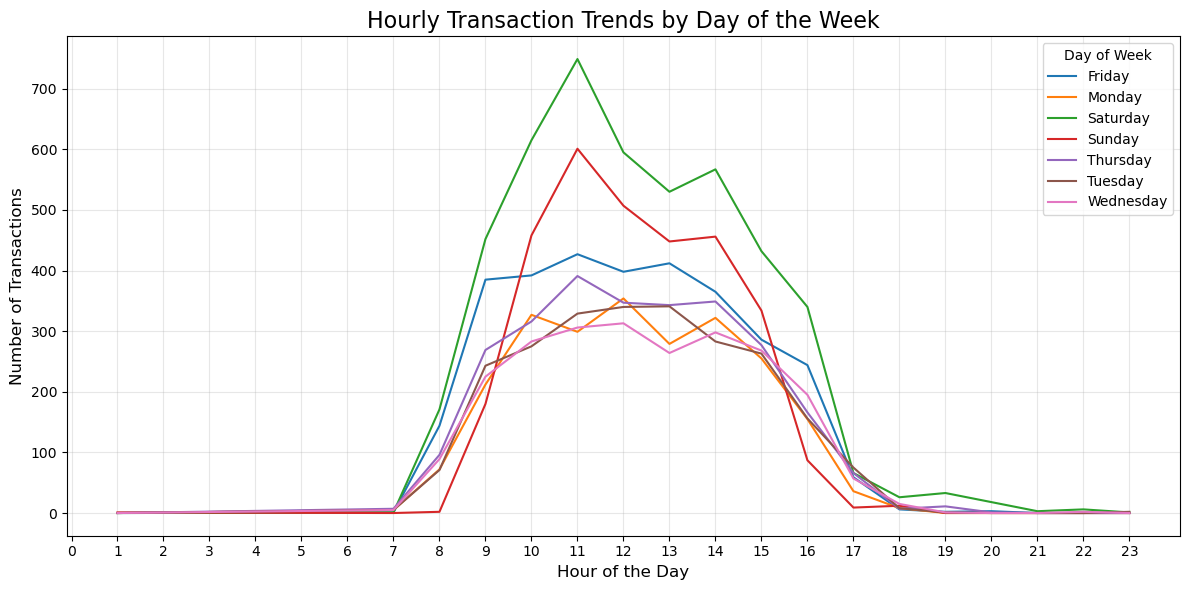

In [25]:

df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour

# Aggregate data
hourly_trends = df.groupby(['hour', 'day_name'])['Transaction'].count().reset_index()

# Pivot the data for plotting
hourly_pivot = hourly_trends.pivot(index='hour', columns='day_name', values='Transaction')
hourly_pivot = hourly_pivot.fillna(0)  # Replace NaNs with 0
# Set up the plot
plt.figure(figsize=(12, 6))

# Plot each day's hourly trend
for day in hourly_pivot.columns:
    plt.plot(hourly_pivot.index, hourly_pivot[day], label=day)

# Add labels, title, and legend
plt.title('Hourly Transaction Trends by Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


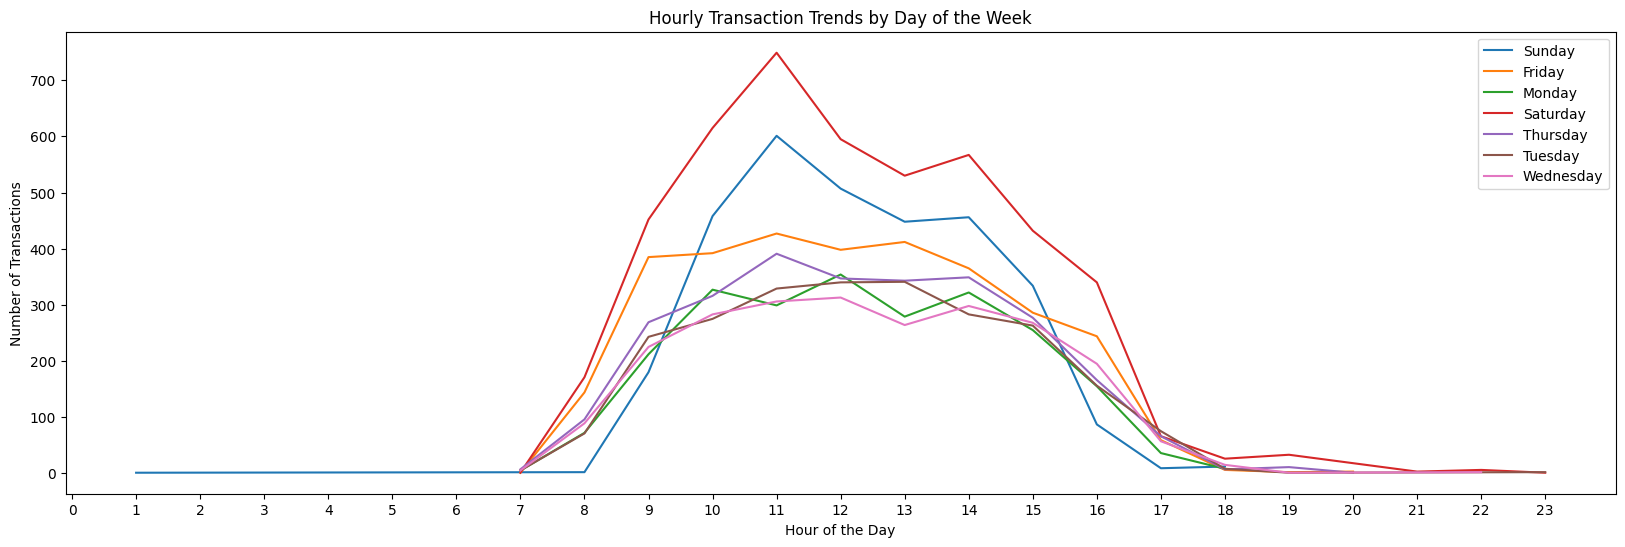

In [ ]:
# 17


18. The daily sales trend plot reveals that saturday transaction volume is largest than the other day

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

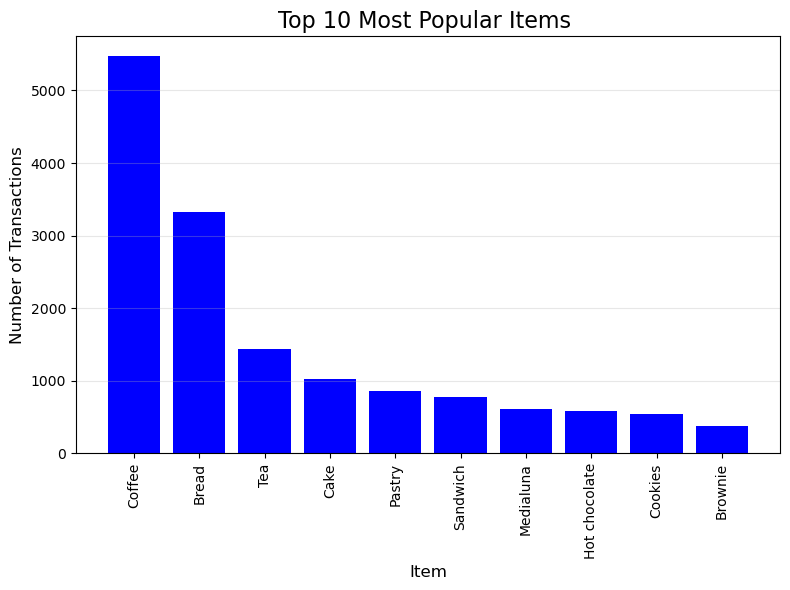

In [30]:
# Group data by 'Item' and count the number of transactions for each
item_sales = df.groupby('Item')['Transaction'].count().reset_index()

# Sort the items by number of transactions in descending order and select top 10
top_10_items = item_sales.sort_values(by='Transaction', ascending=False).head(10)


# Set up the bar chart for top 10 items
plt.figure(figsize=(8, 6))

# Plot the bar chart
plt.bar(top_10_items['Item'], top_10_items['Transaction'], color='blue')

# Add labels, title, and rotation for readability
plt.title('Top 10 Most Popular Items ', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=90)  # Rotate item names for better visibility
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


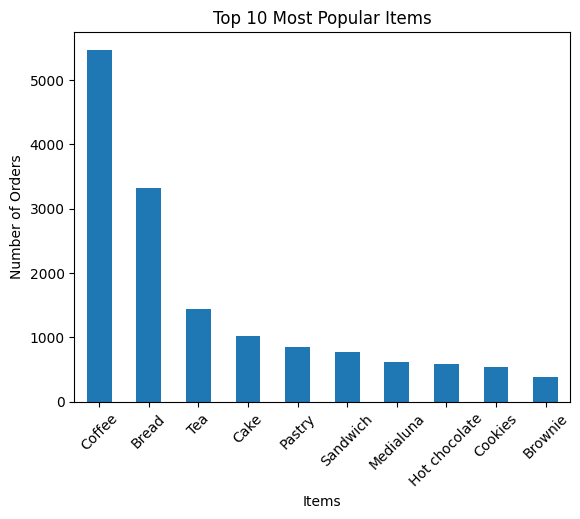

In [ ]:
# 19


Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

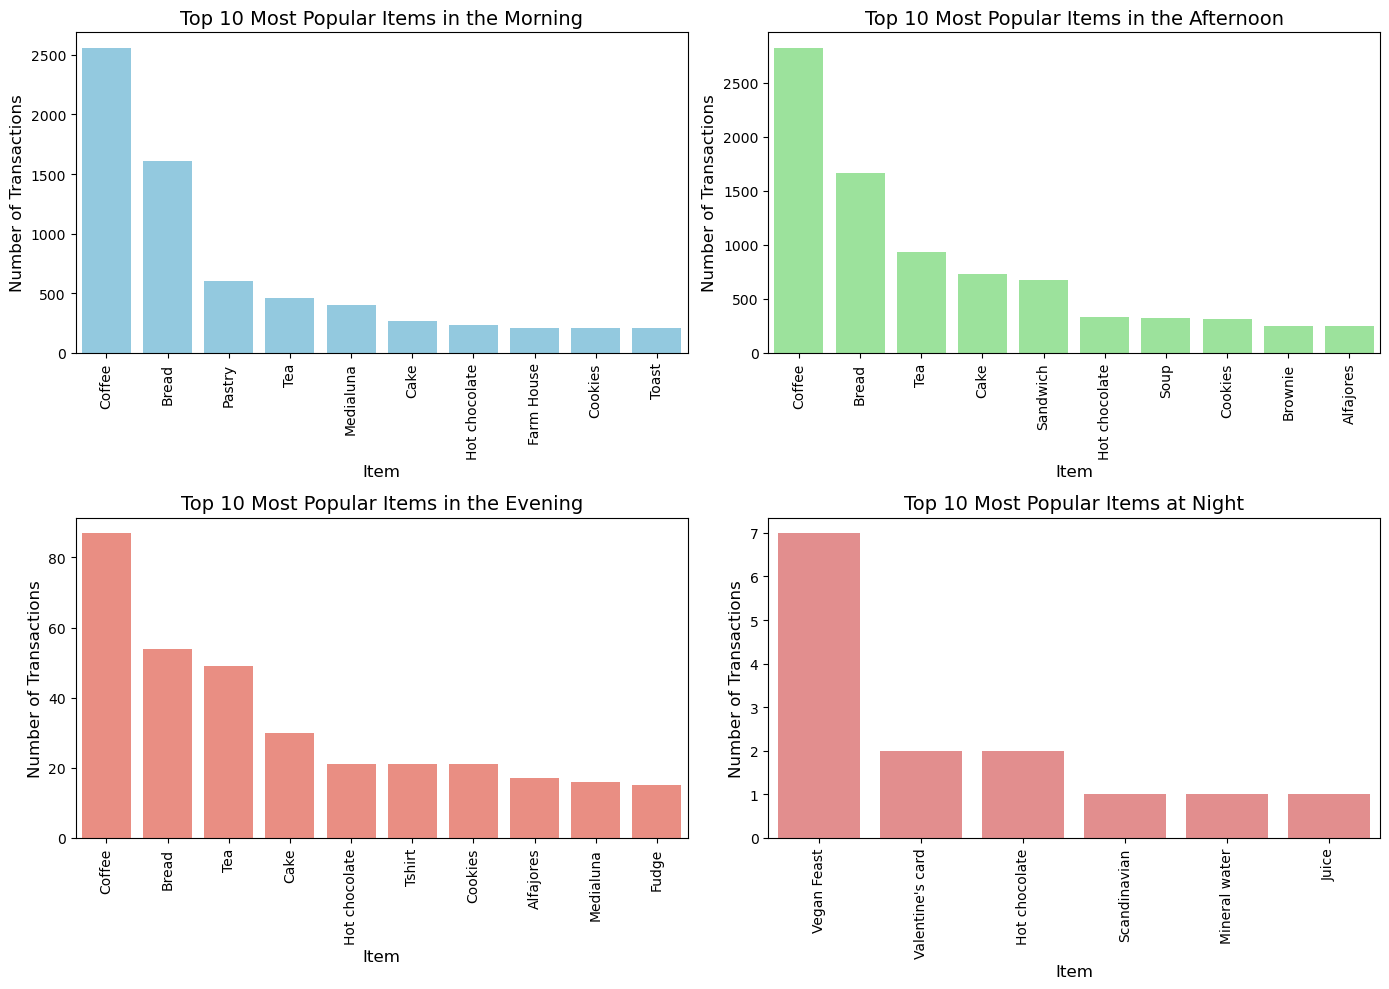

In [32]:
import seaborn as sns
# Group data by 'Item' and 'period_day' and count the number of transactions for each
item_period_sales = df.groupby(['Item', 'period_day'])['Transaction'].count().reset_index()

# Sort the items by number of transactions for each period in descending order
item_period_sales_sorted = item_period_sales.sort_values(by='Transaction', ascending=False)
# Get the top 10 items for each period
top_10_morning = item_period_sales_sorted[item_period_sales_sorted['period_day'] == 'morning'].head(10)
top_10_afternoon = item_period_sales_sorted[item_period_sales_sorted['period_day'] == 'afternoon'].head(10)
top_10_evening = item_period_sales_sorted[item_period_sales_sorted['period_day'] == 'evening'].head(10)
top_10_night = item_period_sales_sorted[item_period_sales_sorted['period_day'] == 'night'].head(10)
# Set up the figure for multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Morning
sns.barplot(data=top_10_morning, x='Item', y='Transaction', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 10 Most Popular Items in the Morning', fontsize=14)
axes[0, 0].set_xlabel('Item', fontsize=12)
axes[0, 0].set_ylabel('Number of Transactions', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot for Afternoon
sns.barplot(data=top_10_afternoon, x='Item', y='Transaction', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Top 10 Most Popular Items in the Afternoon', fontsize=14)
axes[0, 1].set_xlabel('Item', fontsize=12)
axes[0, 1].set_ylabel('Number of Transactions', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot for Evening
sns.barplot(data=top_10_evening, x='Item', y='Transaction', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Top 10 Most Popular Items in the Evening', fontsize=14)
axes[1, 0].set_xlabel('Item', fontsize=12)
axes[1, 0].set_ylabel('Number of Transactions', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot for Night
sns.barplot(data=top_10_night, x='Item', y='Transaction', ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Top 10 Most Popular Items at Night', fontsize=14)
axes[1, 1].set_xlabel('Item', fontsize=12)
axes[1, 1].set_ylabel('Number of Transactions', fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


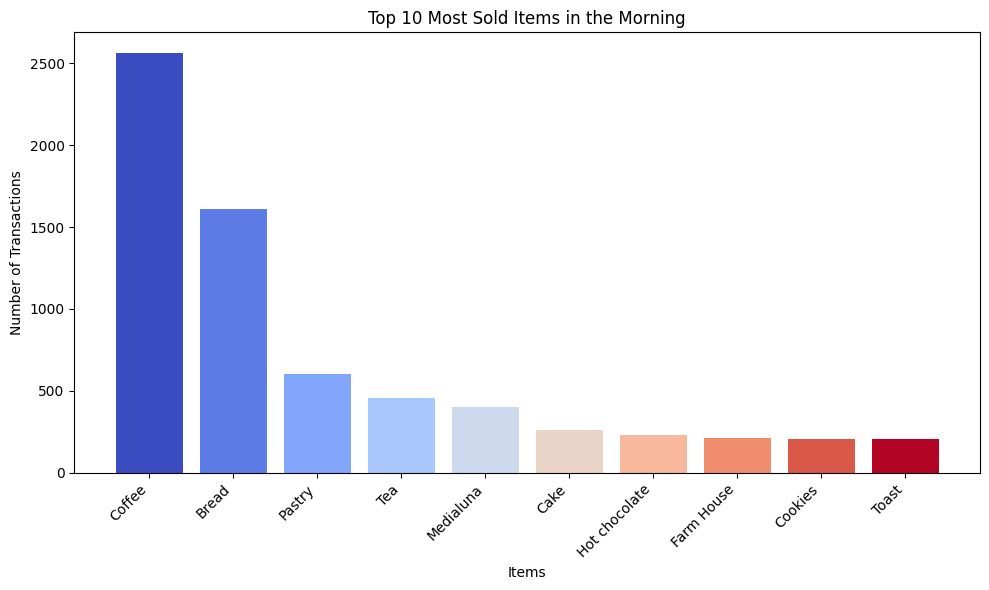

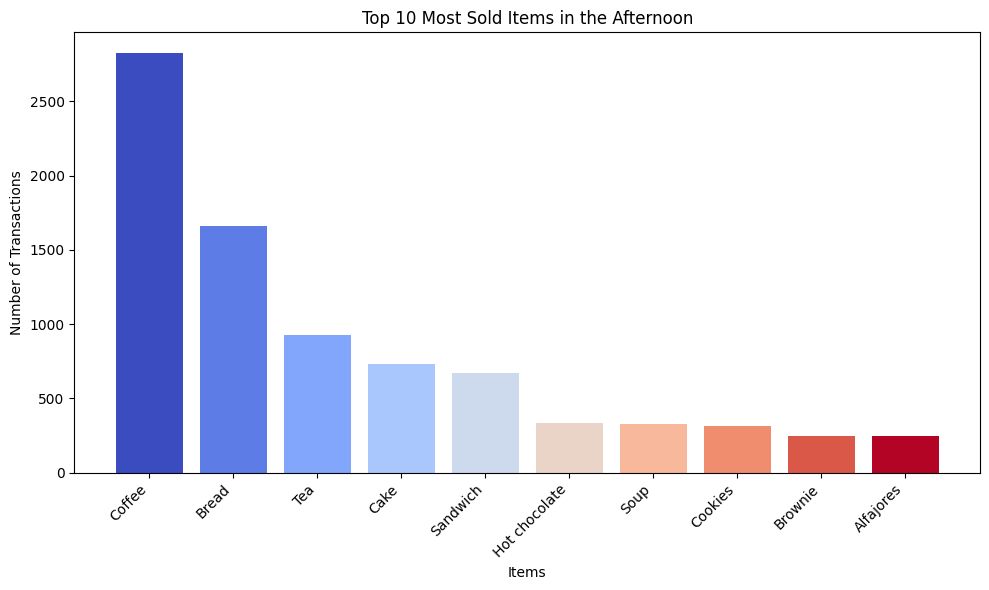

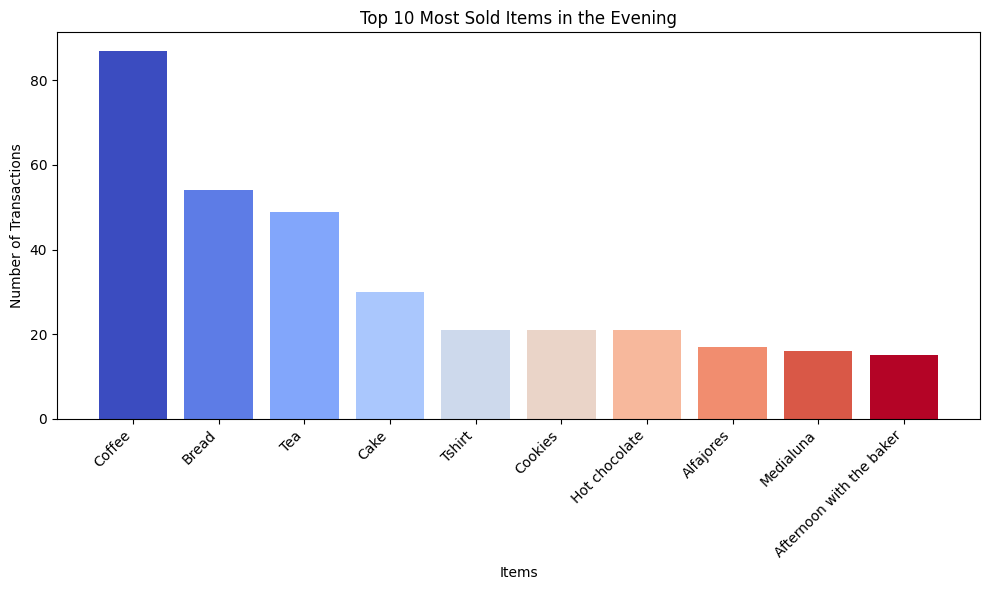

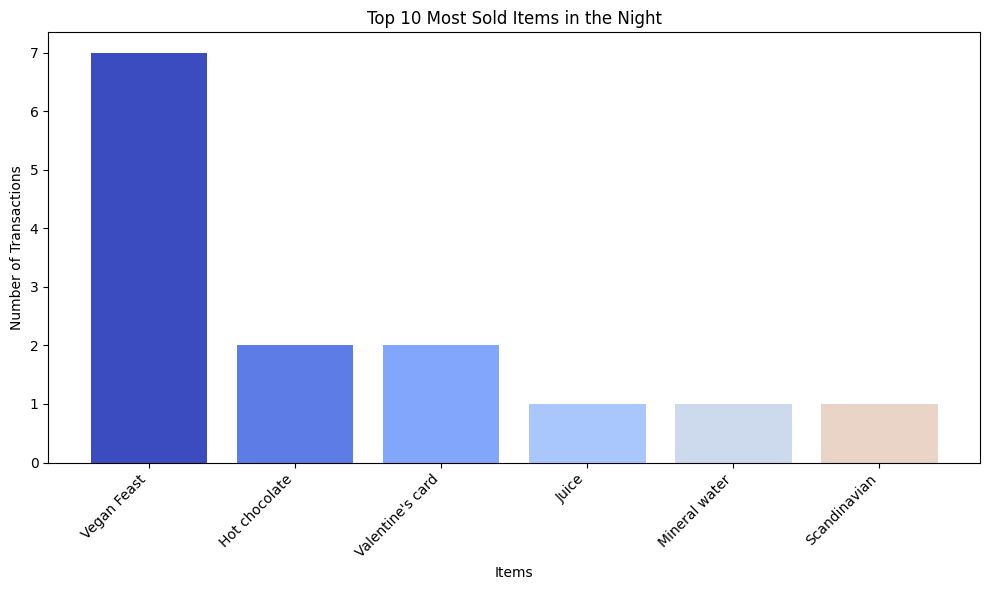

In [ ]:
# 20


21. It turns out that there is something different in the plot above, the insight is at night there is only 6 items that popular


I found a valentine card, I was curious about when people bought it so I made a visualization of it

C:\Users\M.S.I\AppData\Local\Temp\ipykernel_25276\2210100365.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'


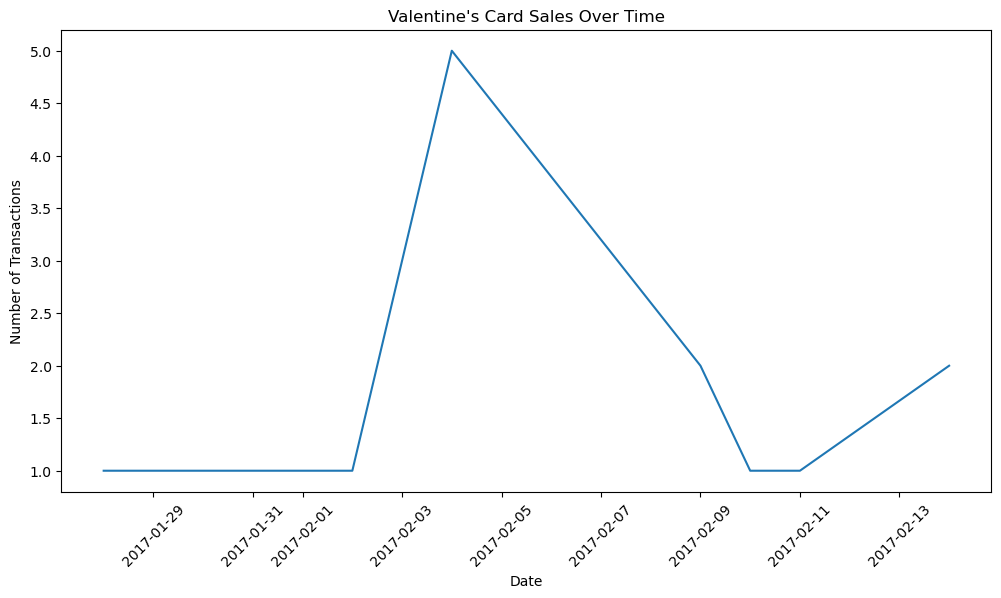

In [47]:
#22
# Assuming df is your DataFrame
# Step 1: Filter for Valentine's card transactions
valentine_sales = df[df['Item'] == "Valentine's card"]

# Step 2: Group by the 'date' column and count the number of transactions
valentine_sales['date'] = valentine_sales['date_time'].dt.date  # Extract date part from 'date_time'
daily_sales_valentine = valentine_sales.groupby('date').size().reset_index(name='transactions')

# Step 3: Convert 'date' column to datetime object
daily_sales_valentine['date'] = pd.to_datetime(daily_sales_valentine['date'])

# Step 4: Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales_valentine['date'], daily_sales_valentine['transactions'])
plt.title("Valentine's Card Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


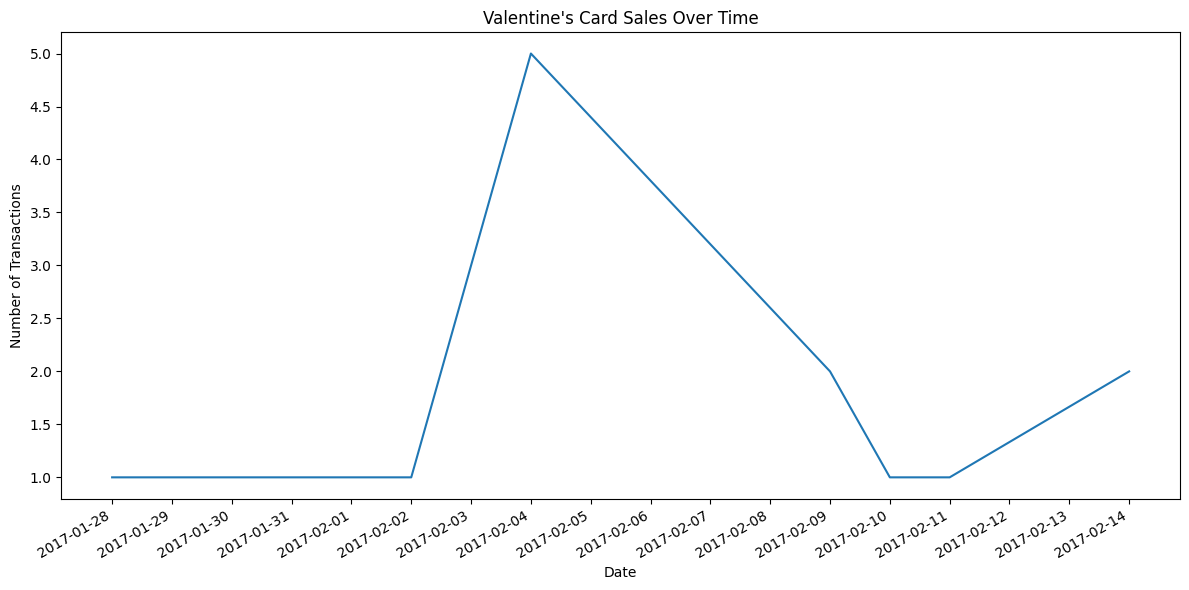

In [ ]:
#22



23. I found the insight from the sale of the Valentine's cards above is ____


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [48]:
# 24
import pandas as pd

# Assuming 'df' is your dataset
# Filter the dataset to select only the relevant items, for example, all the items you want to analyze
items = ['Afternoon with the baker', 'Alfajores', 'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell', 'Bare Popcorn', 'Basket', 'The BART', 'The Nomad', 'Tiffin', 'Toast', 'Truffles', 'Tshirt', "Valentine's card", 'Vegan Feast', 'Vegan mincepie', 'Victorian Sponge']

# Create the binary matrix for the Apriori algorithm
# We will assume the 'Item' column contains the items purchased in each transaction
# and 'Transaction' column represents the transaction identifier

# Initialize the dataframe for one-hot encoding
one_hot_df = pd.DataFrame(0, index=df['Transaction'].unique(), columns=items)

# Loop through the dataframe and set 1 where the item was purchased
for index, row in df.iterrows():
    transaction_id = row['Transaction']
    item = row['Item']
    if item in one_hot_df.columns:
        one_hot_df.at[transaction_id, item] = 1

# The resulting one_hot_df will have transactions as rows and items as columns
# The table will look like the example you provided
one_hot_df.head()

,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 24


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Convert quantities to 1 and 0
# Ensure all values in one_hot_df are binary (1 or 0)
one_hot_df = one_hot_df.applymap(lambda x: 1 if x > 0 else 0)

# Display the first few rows to confirm
one_hot_df.head()



,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#25

# Convert quantities to 1 and 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-9dfa830ecb88>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [52]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Step 1: Ensure 'Item' and 'Transaction' exist in the dataset
if 'Item' in df.columns and 'Transaction' in df.columns:
    # Step 2: Create a one-hot encoded matrix
    one_hot_df = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)
    one_hot_df = one_hot_df.astype(bool)  # Convert to boolean for compatibility

    # Step 3: Apply the Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

    # Step 4: Generate association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

    # Step 5: Format the output
    # Display frequent itemsets
    print("Frequent Itemsets:")
    print(frequent_itemsets[['support', 'itemsets']])

    # Display association rules
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("Dataset must have 'Item' and 'Transaction' columns.")


Frequent Itemsets:
     support                 itemsets
0   0.036344              (Alfajores)
1   0.327205                  (Bread)
2   0.040042                (Brownie)
3   0.103856                   (Cake)
4   0.478394                 (Coffee)
5   0.054411                (Cookies)
6   0.039197             (Farm House)
7   0.058320          (Hot chocolate)
8   0.038563                  (Juice)
9   0.061807              (Medialuna)
10  0.038457                 (Muffin)
11  0.086107                 (Pastry)
12  0.071844               (Sandwich)
13  0.029054           (Scandinavian)
14  0.034548                  (Scone)
15  0.034443                   (Soup)
16  0.142631                    (Tea)
17  0.033597                  (Toast)
18  0.020285               (Truffles)
19  0.023349            (Cake, Bread)
20  0.090016          (Coffee, Bread)
21  0.029160          (Pastry, Bread)
22  0.028104             (Bread, Tea)
23  0.054728           (Cake, Coffee)
24  0.023772              (Cake

In [54]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming 'df' is your dataset with 'Transaction' and 'Item' columns

# Step 1: Create a one-hot encoded matrix
one_hot_df = df.groupby(['Transaction', 'Item']).size().unstack(fill_value=0)
one_hot_df = one_hot_df.astype(bool)  # Convert to boolean for Apriori compatibility

# Step 2: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(one_hot_df, min_support=0.02, use_colnames=True)

# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Step 4: Add Zhang's Metric
def zhangs_metric(row):
    numerator = row['support'] - (row['antecedent support'] * row['consequent support'])
    denominator = max(row['support'] * (1 - row['antecedent support']),
                      row['antecedent support'] * (row['consequent support'] - row['support']))
    return numerator / denominator if denominator != 0 else 0

rules['zhangs_metric'] = rules.apply(zhangs_metric, axis=1)

# Step 5: Format and Display Output
output_rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                      'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Sort by lift for better insights
output_rules = output_rules.sort_values(by='lift', ascending=False)

# Display the result
print(output_rules)



        antecedents      consequents  antecedent support  consequent support  \
5             (Tea)           (Cake)            0.142631            0.103856   
4            (Cake)            (Tea)            0.103856            0.142631   
19         (Coffee)          (Toast)            0.478394            0.033597   
18          (Toast)         (Coffee)            0.033597            0.478394   
13         (Coffee)      (Medialuna)            0.478394            0.061807   
12      (Medialuna)         (Coffee)            0.061807            0.478394   
15         (Coffee)         (Pastry)            0.478394            0.086107   
14         (Pastry)         (Coffee)            0.086107            0.478394   
11         (Coffee)          (Juice)            0.478394            0.038563   
10          (Juice)         (Coffee)            0.038563            0.478394   
16       (Sandwich)         (Coffee)            0.071844            0.478394   
17         (Coffee)       (Sandwich)    

In [ ]:
# 27


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
13,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
15,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
10,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
16,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
3,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:
 The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:

Key findings from the analysis:

Popular Items: Coffee (47.8%), Bread (32.7%), and Tea (14.2%) are most purchased.
Item Combinations: Strong pairings include Cake & Coffee (5.5%) and Tea & Cake (2.4%).
Association Rule: Toast → Coffee shows a strong relationship (Lift: 1.47).
